# Regression

The dataset is taken from the source : "https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength"  
The data consists of the following features: 
1. Cement (in kg/m^3)
2. Blast Furnace Slag (in kg/m^3)
3. Fly Ash (in kg/m^3)
4. Water (in kg/m^3)
5. Superplasticizer (in kg/m^3)
6. Coarse Aggregate (in kg/m^3)
7. Fine Aggregate (in kg/m^3)
8. Age (day)
<br>
The label is the 'Concrete Compressive strength (in MPa)'. 

Since the data consists of continous or integer numerical values as input features in order to predict the label called concrete compressive strength, regression methods can be applied on the dataset.   
The results obtained by the following regression models are compared :
1. polynomial regression
2. K-Nearest Neighbors regression
3. Support vector regression
4. Decision Tree regression
5. Random Forest regression
6. Adaptive Boosting regression
7. Gradient Boosting regression 

In [319]:
# importing libraries

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [321]:
df = pd.read_csv("Concrete Compressive Strength.csv")

In [322]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [96]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [324]:
df.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

<b> There appears to be no missing values in the dataset <b>

## Data visualization

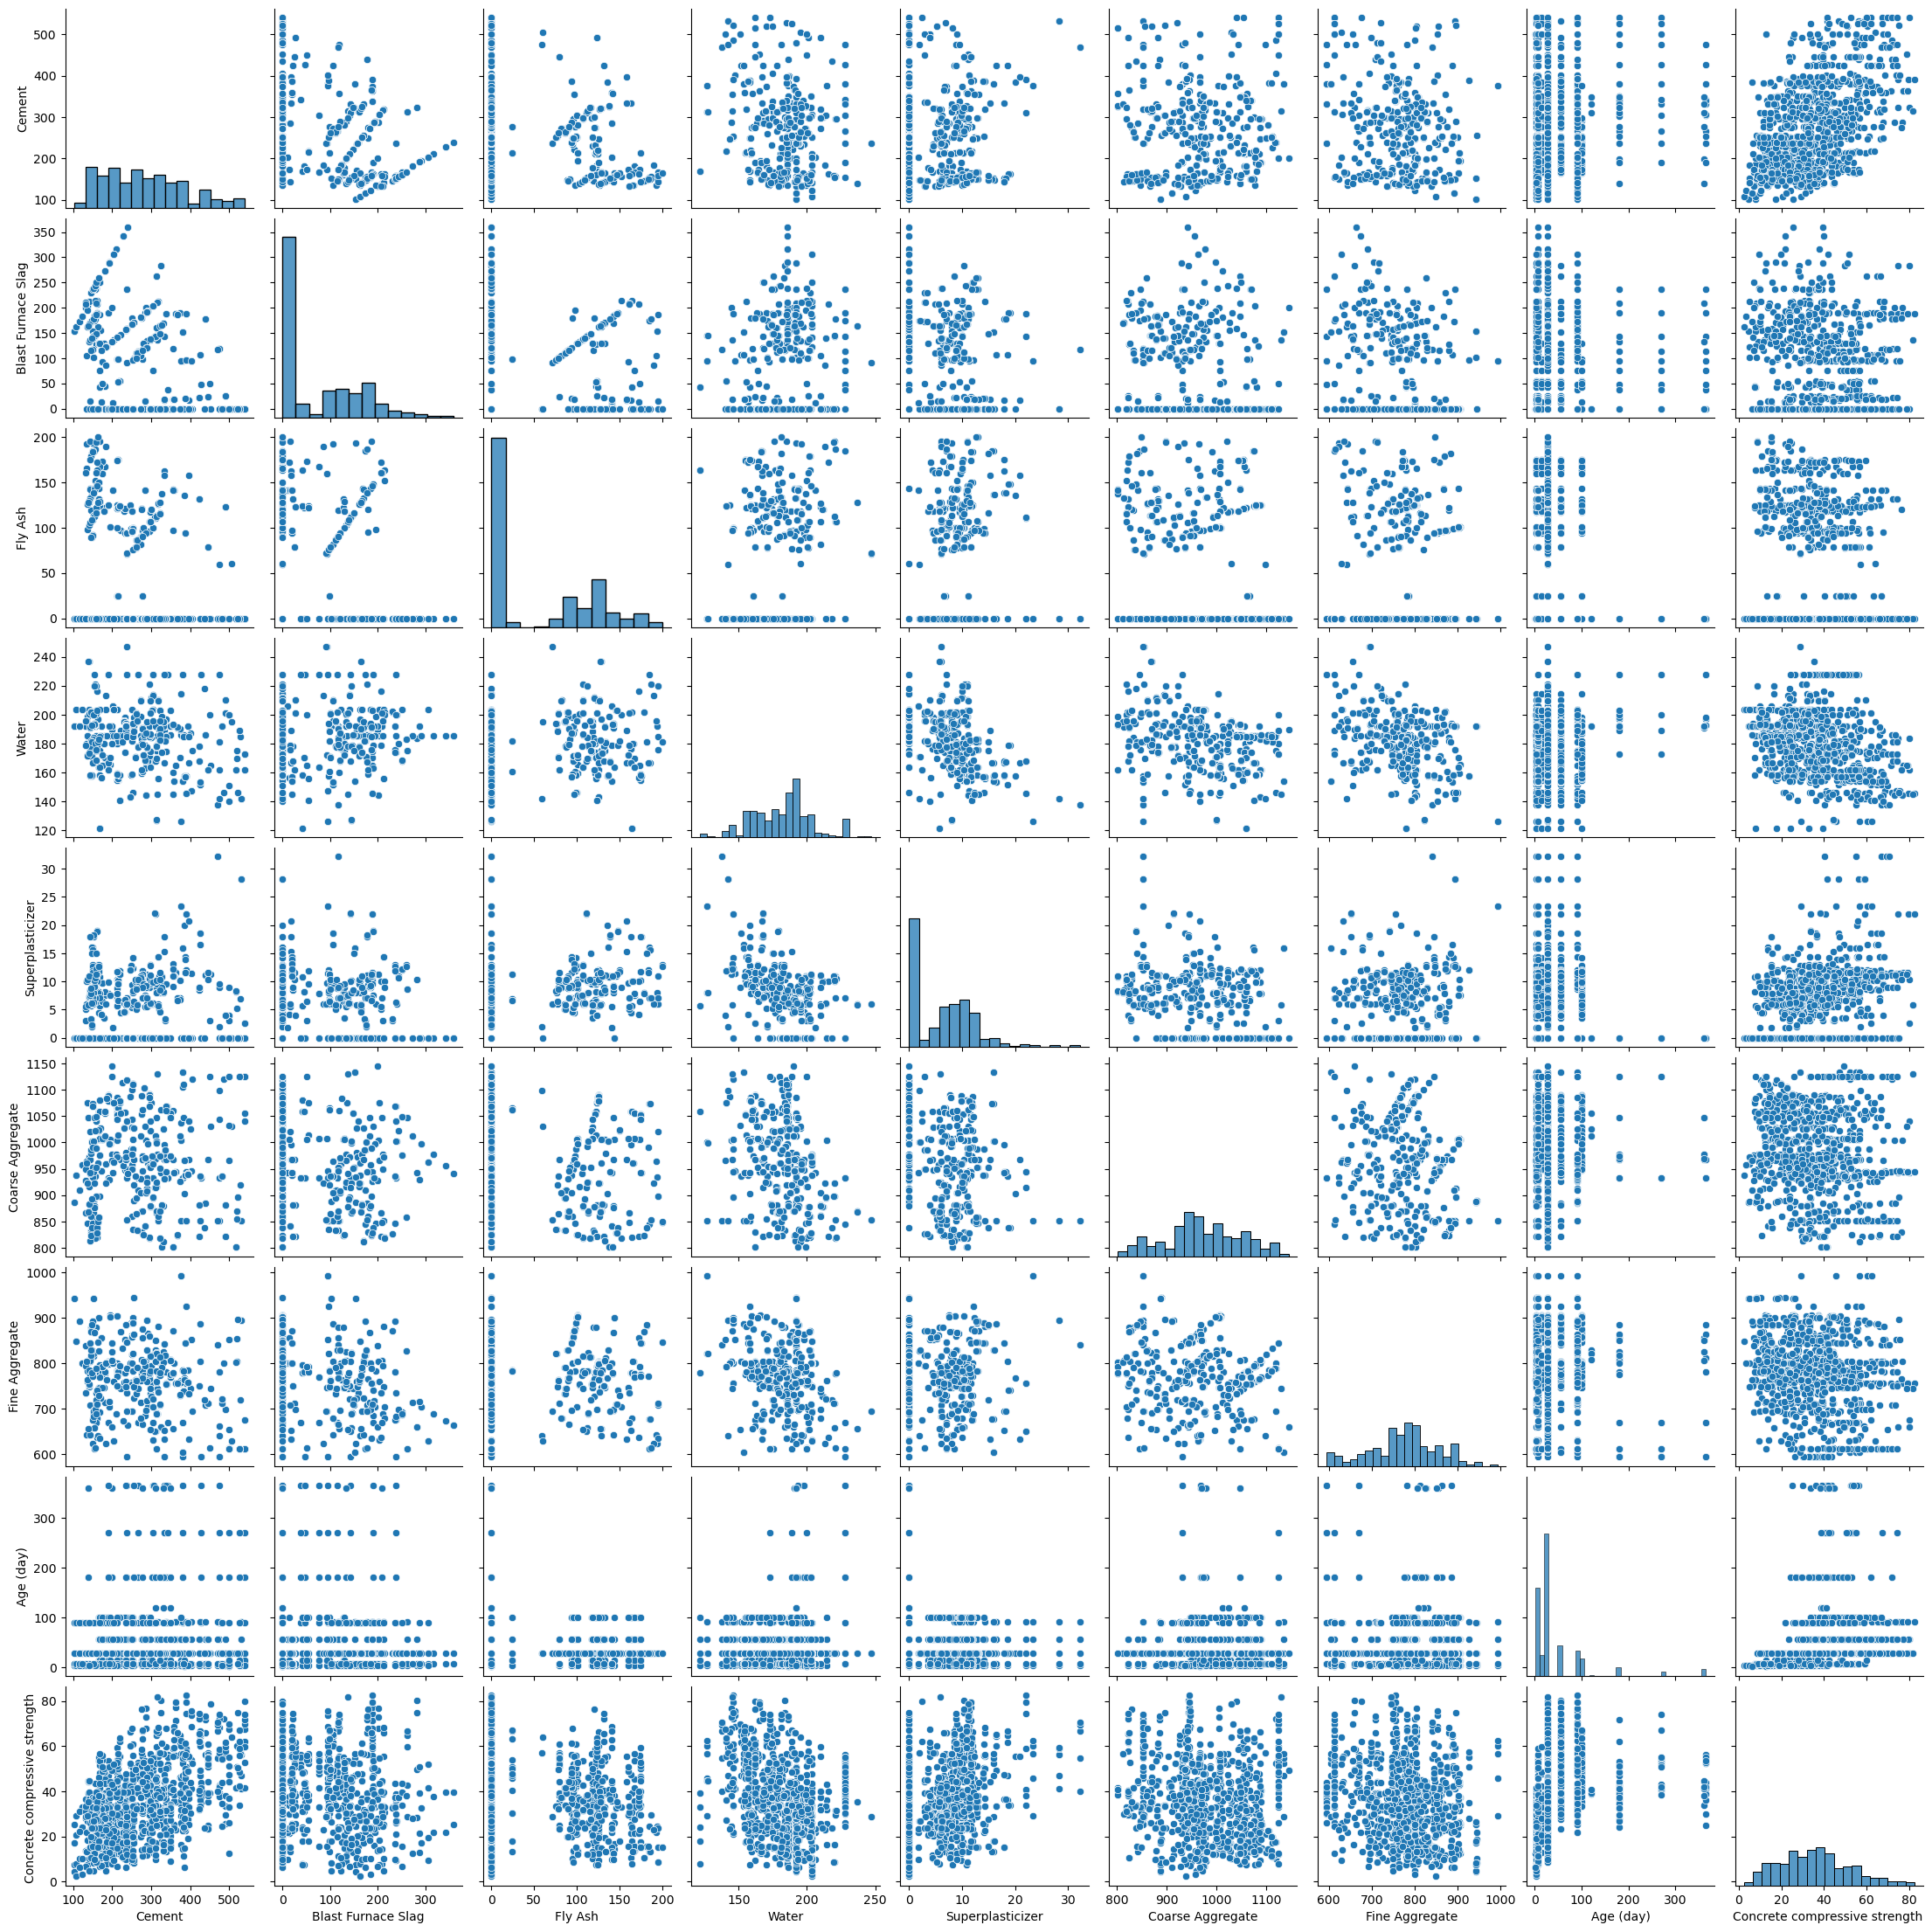

In [7]:
sns.pairplot(df)

<b> There appears to be a linear relationship between the 'Cement' and 'Concrete Compressive Strength' <b>

<Axes: xlabel='Concrete compressive strength ', ylabel='Cement'>

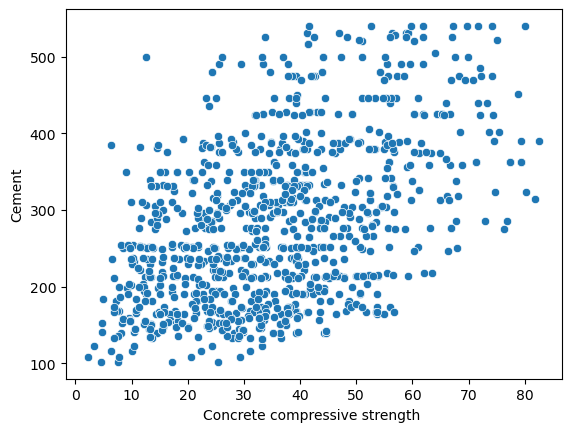

In [323]:
sns.scatterplot(data=df,x='Concrete compressive strength ',y='Cement')

In [ ]:
#Splitting the variables into features as X and label as y 

In [125]:
X = df.drop('Concrete compressive strength ',axis=1)

In [126]:
y=df['Concrete compressive strength ']

In [127]:
#splitting the data set into train data and test data such that the test set consists of 30% of the total data

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [130]:
#scaling the data

In [132]:
scaler = StandardScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_test = scaler.transform(X_test)

### Polynomial Regression


We can find out which polynomial degree gives the least error values by finding the root mean squared error for polynomial fitting of curves with degrees 1 to 10.

In [329]:
# Root mean squared errors as a list
rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"

    polynomial_converter = PolynomialFeatures(degree=d)
    X_train_poly = polynomial_converter.fit_transform(X_train)
    X_test_poly = polynomial_converter.transform(X_test)
    
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression()
    model.fit(X_train_poly,y_train)
    
    # PREDICT ON TEST DATASET
    test_pred = model.predict(X_test_poly)
    
    # Calculate Root Mean Squared Errors (RMSE)
    MSE = mean_squared_error(y_test,test_pred)
    RMSE = np.sqrt(MSE)
    
    # Append errors to lists for plotting later
    rmse_errors.append(RMSE)

In [330]:
rmse_errors

[10.476456492427129,
 7.748621368301256,
 6.090177853274999,
 175.26288230978557,
 4255.323894468205,
 228861.90152307594,
 487776.880715375,
 206836.38597381522,
 282773690.8024765]

<b> The RMSE tend to decrease from polynomial degree of 1 to 3 and then RMSE increases rapidly from polynomial degree 4 since the model tends to over-fit small noise leading to increase in error on test set. We could obtain a good bias-variance tradeoff with a polynomical degree of 3.<b>

In [331]:
#plotting the RMSE values vs polynomical degree

Text(0, 0.5, 'RMSE')

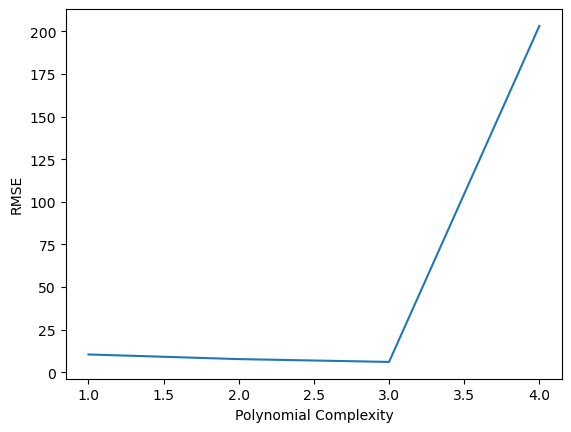

In [332]:
plt.plot(range(1,5),test_rmse_errors[:4])
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")


### Elastic Net

<b> Using ElasticNetCV for identifying elasticnet hyperparameters in order to use them to predict the label. <b>

In [176]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],n_alphas=15,cv=5)

In [354]:
elastic_model.fit(X_train,y_train)

In [178]:
#we will find out the best hyperparameters of elastic net model by using the attributes

In [179]:
elastic_model.alpha_

0.011916600814288806

In [180]:
elastic_model.l1_ratio_

0.7

In [181]:
y_pred = elastic_model.predict(X_test)

In [182]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [184]:
RMSE

10.452139704050023

<b> RMSE is similar to the predicted values using simple linear regression i.e of polynomial degree of 1. Hence, polynomial regression of degree 3 is considered to be better at predicting the concrete compressive strength than the elastic net model. <b>

### KNN Regression

Tuning the hyperparameter called 'number of nearest neighbors' using gridsearchCV and plotting the results as follows:

In [341]:
param_grid  =  {'knn__n_neighbors' : range(1,6) }

In [342]:
pipe = Pipeline([('knn',KNeighborsRegressor())])

In [345]:
gridsearch = GridSearchCV(pipe,param_grid,scoring='neg_root_mean_squared_error',cv=5)

In [355]:
gridsearch.fit(X_train,y_train)

In [347]:
gridsearch.best_params_

{'knn__n_neighbors': 3}

In [348]:
results = pd.DataFrame(gridsearch.cv_results_)

In [349]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003398,0.000489,0.003415,0.001000,1,{'knn__n_neighbors': 1},-10.501765,-11.220099,-8.912834,-10.266359,-9.936143,-10.167440,0.755934,5
1,0.003406,0.000807,0.004192,0.000384,2,{'knn__n_neighbors': 2},-10.444691,-10.072936,-8.038368,-9.286076,-8.999590,-9.368332,0.844577,3
2,0.003219,0.000354,0.004647,0.000767,3,{'knn__n_neighbors': 3},-10.395298,-9.718427,-8.206277,-9.605857,-8.663615,-9.317895,0.783316,1
3,0.003269,0.000375,0.004600,0.000464,4,{'knn__n_neighbors': 4},-10.561025,-9.870878,-8.338462,-9.384271,-8.536459,-9.338219,0.827458,2
4,0.003004,0.000006,0.004811,0.000412,5,{'knn__n_neighbors': 5},-10.038924,-10.268081,-8.157653,-9.556435,-9.106749,-9.425568,0.749989,4


Text(0, 0.5, 'RMSE')

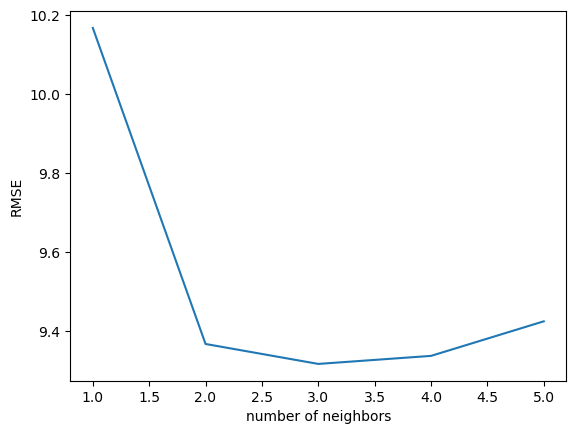

In [350]:
plt.plot(results['param_knn__n_neighbors'],-results['mean_test_score'])
plt.xlabel('number of neighbors')
plt.ylabel('RMSE')

The KNN regression method with numer of nearest neighbors as 3 produced the least RMSE.  
Thus, using this parameter to predict the test data

In [351]:
y_pred = gridsearch.predict(X_test)

In [352]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [353]:
RMSE

9.347997428508862

## Support Vector Regression, Single Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, Adaptive Boosting Regression

Using a pipeline and grid search CV for tuning the best hyperparameters

In [317]:
    pipeline_svr = Pipeline([
    ('svr', SVR())
    ])

    pipeline_decision_tree = Pipeline([
        ('decision_tree',DecisionTreeRegressor())])

    pipeline_random_forest = Pipeline([
        ('random_forest',RandomForestRegressor())])

    pipeline_adaboost = Pipeline([
       ('adaboost',AdaBoostRegressor())])

    pipeline_gradientboost = Pipeline([
        ('gradientboost',GradientBoostingRegressor())])



    parameters_svr = {
    'svr__C':[0.001,0.01,0.1,0.5,1],
    'svr__epsilon':[0,0.01,0.1,0.5,1,2]
    }

    parameters_decision_tree = {
        #we want to use default parameters
    }

    parameters_random_forest = {
        'random_forest__n_estimators':[100,200,300]
    }

    parameters_adaboost = {
       'adaboost__n_estimators' : [10,50,100]
   }

    parameters_gradientboost = {
        'gradientboost__n_estimators':[50,100,200],
        'gradientboost__max_depth':[3,4,5,6]
    }




    pipelines = [pipeline_svr,pipeline_decision_tree,pipeline_random_forest,pipeline_adaboost,pipeline_gradientboost]
    param_grid = [parameters_svr,parameters_decision_tree,parameters_random_forest,parameters_adaboost,parameters_gradientboost]


RMSE_final = []

    for i in range(len(pipelines)):
        grid_search = GridSearchCV(pipelines[i], param_grid[i], cv=5)
        grid_search.fit(X_train, y_train)
        print (grid_search.best_params_)
        y_pred = grid_search.predict(X_test)
        MSE = mean_squared_error(y_test,y_pred)
        RMSE = np.sqrt(MSE)
        RMSE_final.append(RMSE)

{'svr__C': 1, 'svr__epsilon': 1}
{}
{'random_forest__n_estimators': 200}
{'adaboost__n_estimators': 100}
{'gradientboost__max_depth': 4, 'gradientboost__n_estimators': 200}


In [318]:
RMSE_final

[10.320918389508254,
 6.499681327062835,
 5.533306583326003,
 7.5724440181671415,
 4.455137563912142]

The above RMSE values are the error values calculated on the predictions using support vector regressor, decision tree regressor, random forest regressor, adaboost regressor and gradient boosting regressor respectively.  

<b> The RMSE value for the predictions using gradient boosting regressor is the lowest. Hence, the gradient boosting regression method is a suitable method to predict the concrete compressive strength <b>